# Name: Ahmed Bashir
# Student ID: PIAIC96888
# Deep Learning Assignment

# LINEAR REGRESSION - CAR PRICE CASE STUDY

### Importing and Understanding Data

In [51]:
import pandas as pd
import numpy as np

In [52]:
# Importing CarPrice_Assignment.csv
carprice = pd.read_csv('CarPrice_Assignment.csv')

In [53]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [54]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [55]:
# Checking for Null values
carprice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [56]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Visualizing Data

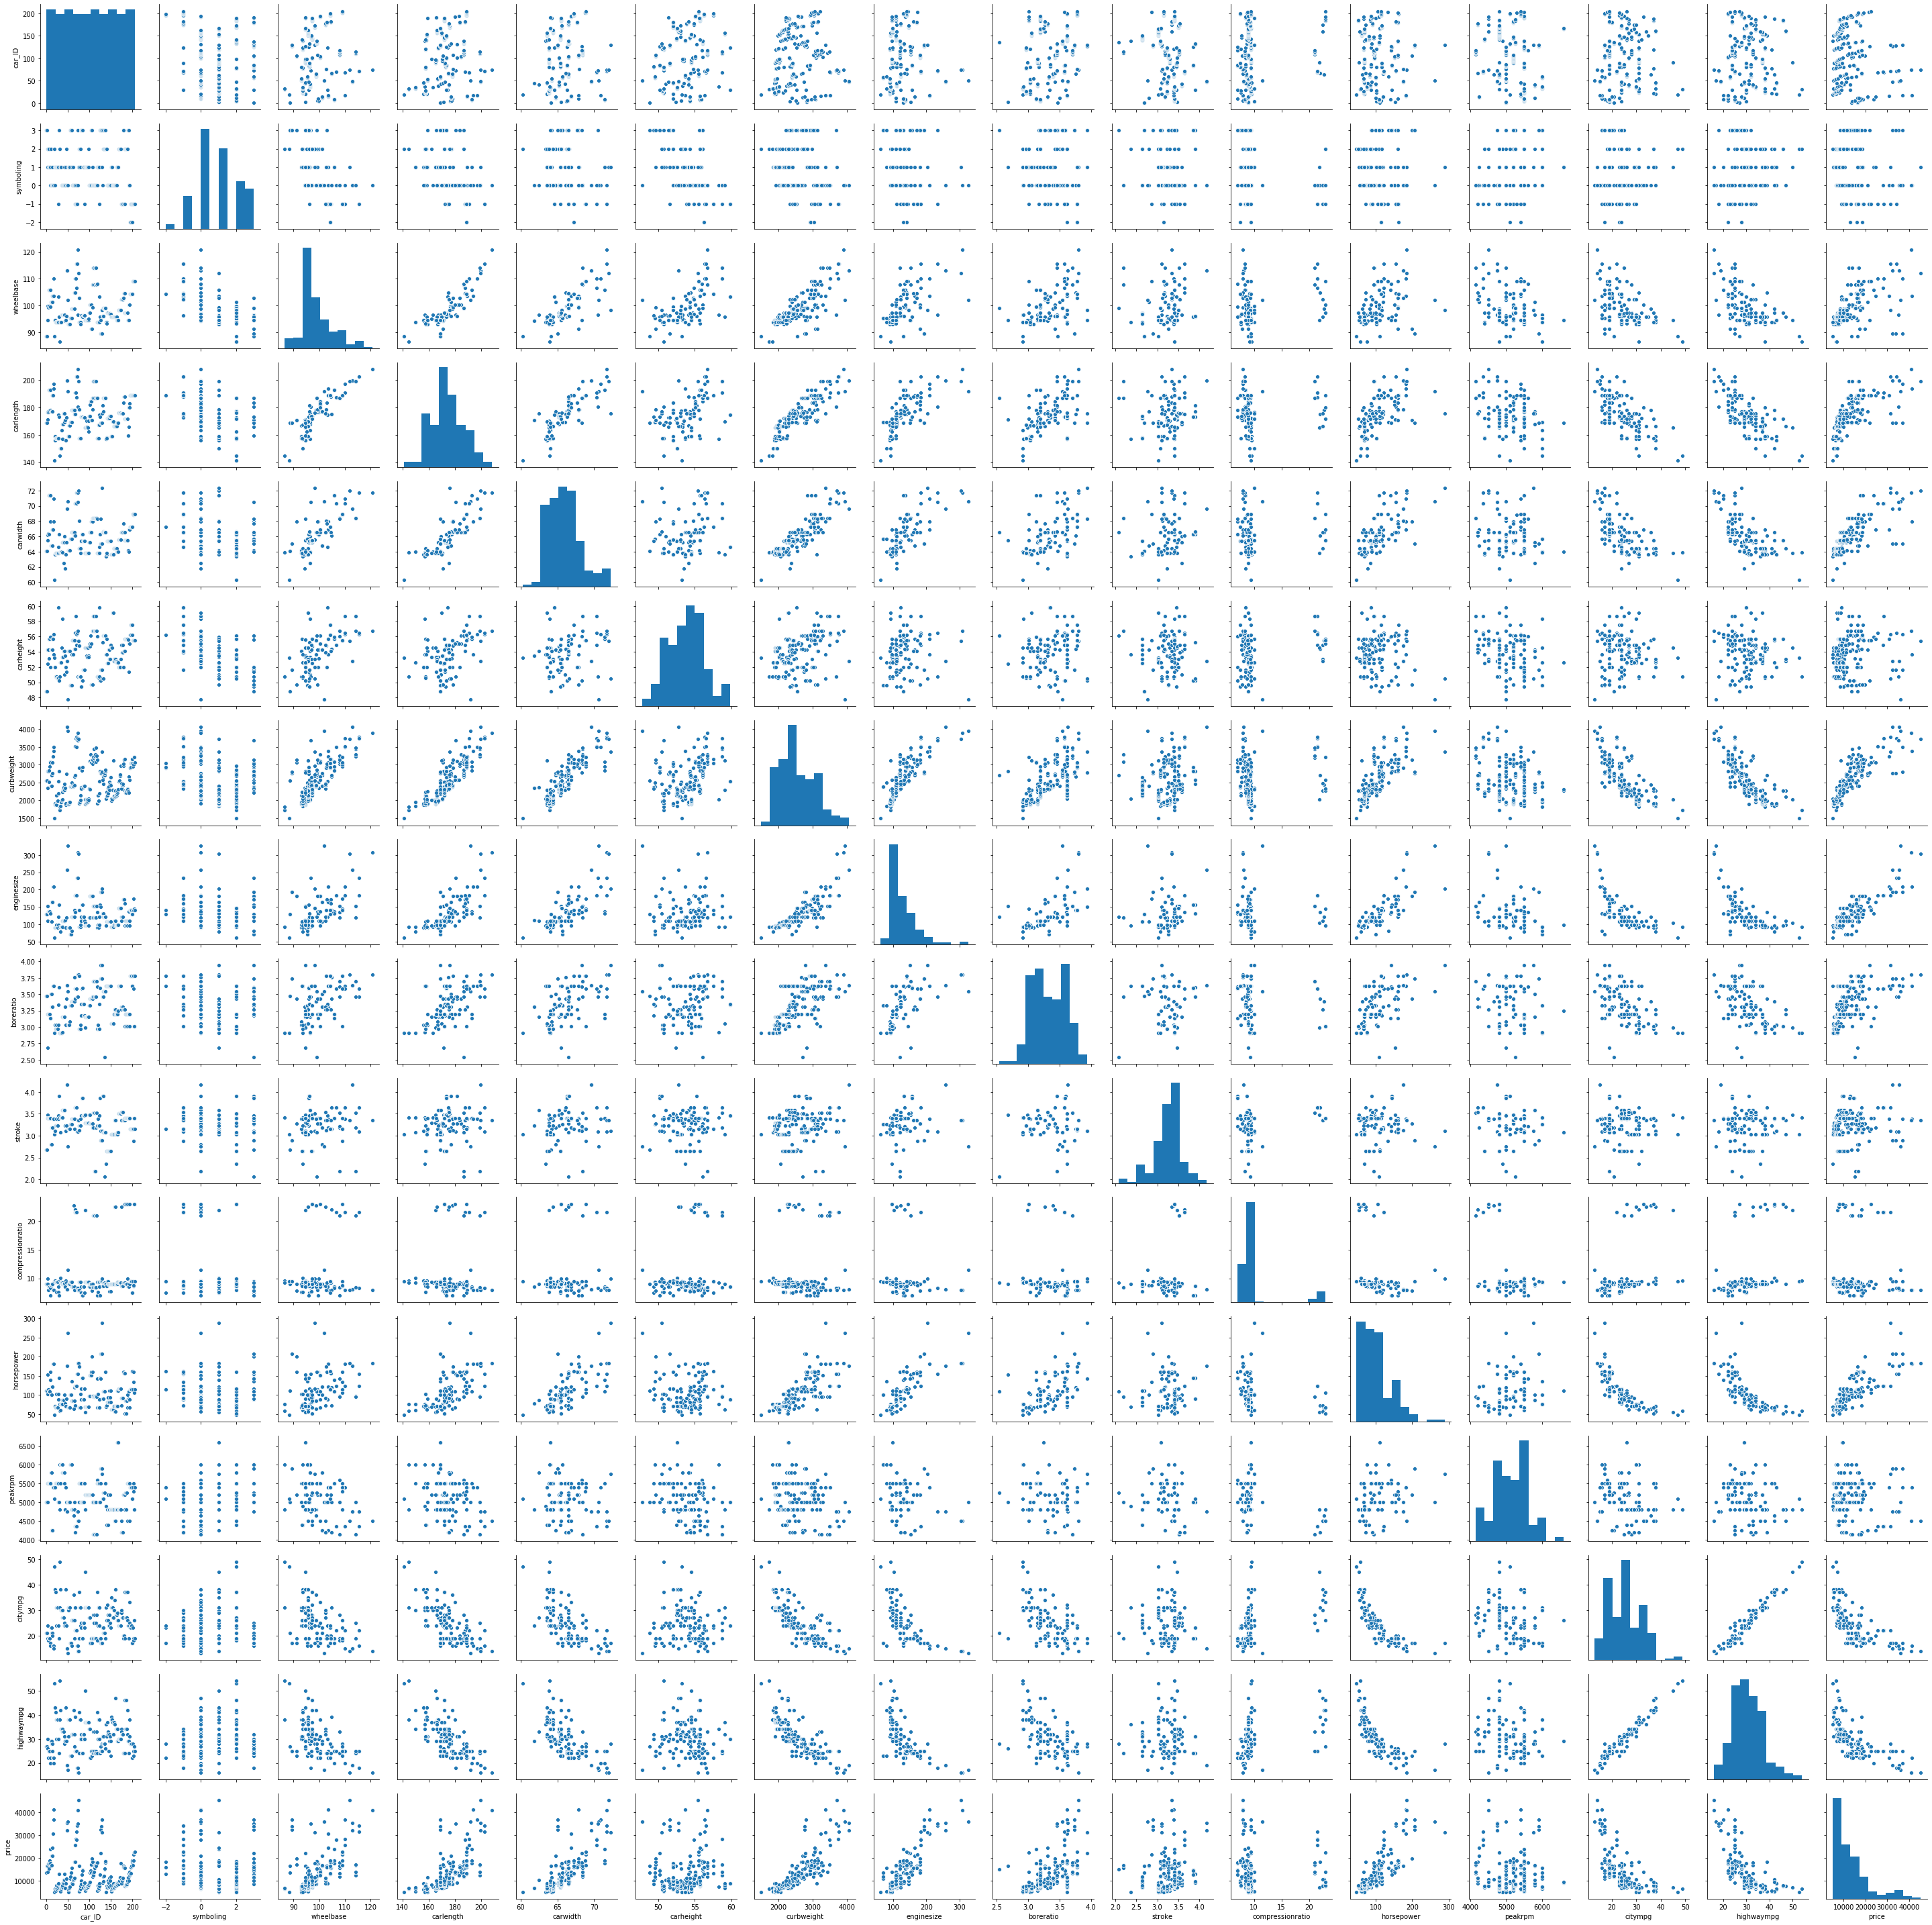

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(carprice)

#### Ploting numerical variables vs price to see their tread

C:\Users\fc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


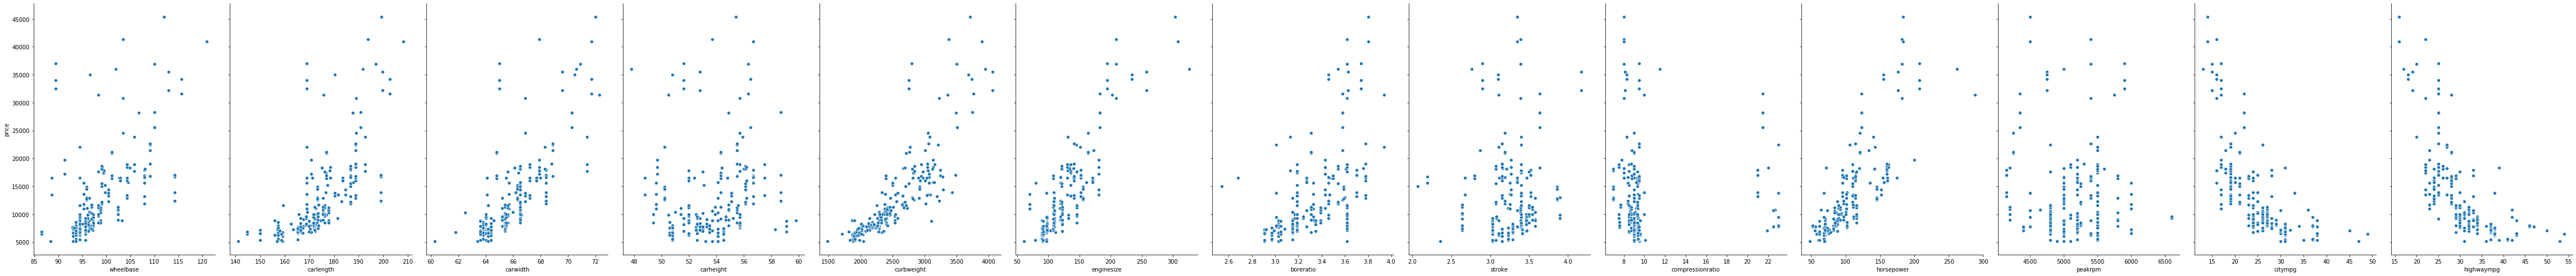

In [58]:
numerical_variables = ['wheelbase','carlength','carwidth', 'carheight','curbweight',\
                                        'enginesize','boreratio','stroke','compressionratio','horsepower',\
                                       'peakrpm','citympg','highwaympg']
sns.pairplot(carprice, x_vars=numerical_variables, y_vars='price',size=7, aspect=0.7, kind='scatter')

#### Finding correlation between vairables

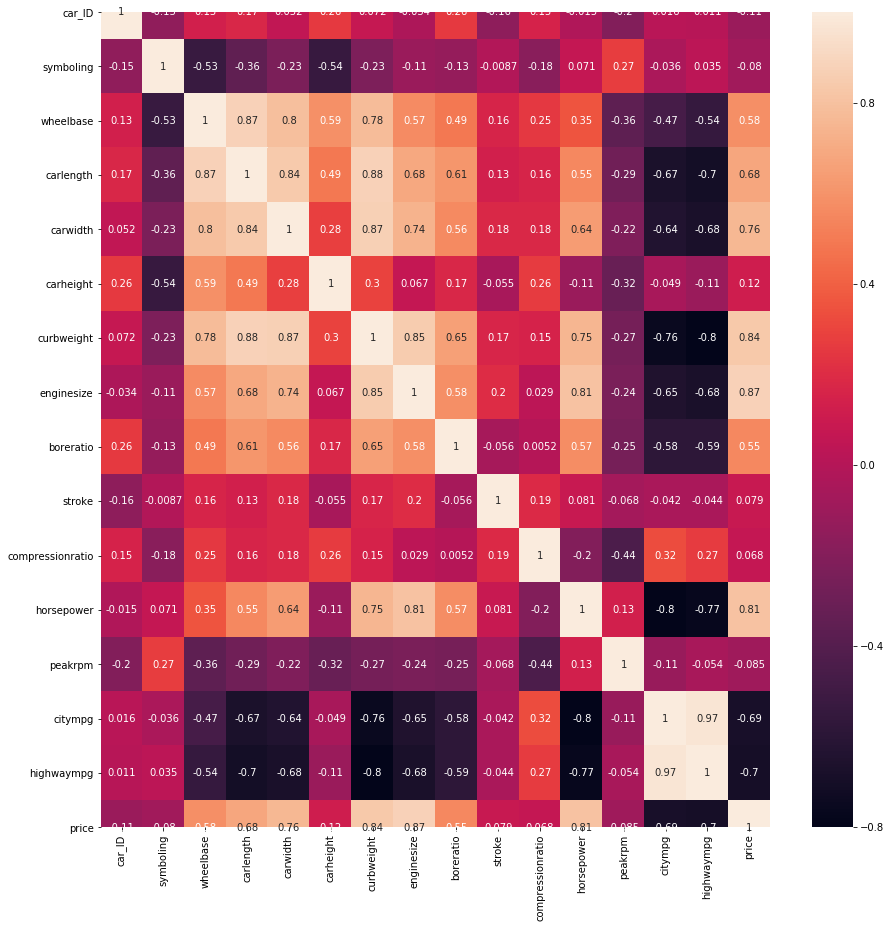

In [59]:
plt.figure(figsize = (15,15))
sns.heatmap(carprice.corr(),annot = True)

From above charts it is clear that ```price``` is highly positive correlated with ```enginesize```, ```curbweight```, ```carwidth``` and ```carlength```. Also it is highly negative correlated with  ```citympg``` and ```highwaympg``` 

### Handling categorical variable

In [60]:
# Creating  CarCompany from CarName
carprice['CarCompany'] = carprice['CarName'].apply(lambda x: x.split(' ')[0].lower())
carprice['CarCompany'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarCompany, dtype: object

#### Cleaning the ```drivewheel``` column

In [61]:
carprice['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### We see following spelling errors
- ```maxda```, ```mazda```
- ```porsche```, ```porcshce```
- ```toyota```, ```toyouta```
- ```vokswagen```, ```volkswagen```, ```vw```

In [62]:
carprice['CarCompany'] = carprice['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('maxda', 'mazda'))
carprice['CarCompany'] = carprice['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('porcshce', 'porsche'))
carprice['CarCompany'] = carprice['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('toyouta', 'toyota'))
carprice['CarCompany'] = carprice['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('vokswagen', 'volkswagen'))
carprice['CarCompany'] = carprice['CarCompany'].apply(lambda c : c if pd.isnull(c) else c.replace('vw', 'volkswagen'))
carprice['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### ```drivewheel``` has spelling mistake. `4wd` should be `fwd`. 

In [63]:
carprice['drivewheel'] = carprice['drivewheel'].apply(lambda c : c if pd.isnull(c) else c.replace('4', 'f'))
carprice['drivewheel'].head()

0    rwd
1    rwd
2    rwd
3    fwd
4    fwd
Name: drivewheel, dtype: object

#### Converting ```symboling``` to a categorical variable

In [64]:
carprice.symboling = pd.Categorical(carprice.symboling)

In [65]:
carprice.describe(include=['O'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarCompany
count,205,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,2,2,7,7,8,22
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi,toyota
freq,6,185,168,115,96,129,202,148,159,94,32


#### Diplaying all the unique values of the categorical variables

In [66]:
def printCategoricalVal(colName):
    print('%s values :-' % colName)
    print(carprice[colName].unique())
    print('\n')
    
categorical_variables = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel', \
 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany']

[ printCategoricalVal(item) for item in categorical_variables]

symboling values :-
[3, 1, 2, 0, -1, -2]
Categories (6, int64): [3, 1, 2, 0, -1, -2]


fueltype values :-
['gas' 'diesel']


aspiration values :-
['std' 'turbo']


doornumber values :-
['two' 'four']


carbody values :-
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


drivewheel values :-
['rwd' 'fwd']


enginelocation values :-
['front' 'rear']


enginetype values :-
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


cylindernumber values :-
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


fuelsystem values :-
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


CarCompany values :-
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']




[None, None, None, None, None, None, None, None, None, None, None]

#### Getting Dummy variables of all catergorical values

In [67]:
categorical_df = pd.get_dummies(carprice.loc[:,categorical_variables], prefix=categorical_variables, drop_first=True)
categorical_df.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Adding the results to the ```carprice_master`` dataframe

In [68]:
carprice_master = pd.concat([carprice.loc[:, numerical_variables], categorical_df, carprice.loc[:, 'price']],axis=1)
carprice_master.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,17450.0


### Rescaling the Features 

In [69]:
carprice_master.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_chevrolet',
       'CarCompany_dod

In [70]:
#UDFf fot min-max scaling (Normalization)
def minMaxScaler (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))

In [71]:
carprice_master = carprice_master.apply(minMaxScaler)
carprice_master.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,price
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207959
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282558
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282558
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.219254
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306142


C:\Users\fc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


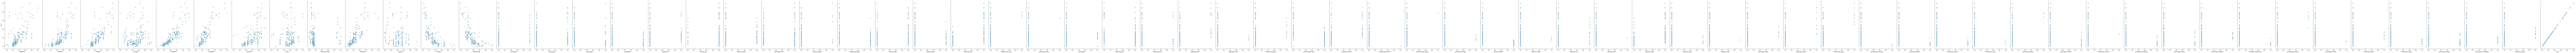

In [72]:
sns.pairplot(carprice_master, x_vars=carprice_master.columns, y_vars='price',size=7, aspect=0.7, kind='scatter')

### Splitting data into training and testing sets

In [73]:
# Putting feature variable to X
X = carprice_master[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_chevrolet',
       'CarCompany_dodge', 'CarCompany_honda', 'CarCompany_isuzu',
       'CarCompany_jaguar', 'CarCompany_mazda', 'CarCompany_mercury',
       'CarCompany_mitsubishi', 'CarCompany_nissan', 'CarCompany_peugeot',
       'CarCompany_plymouth', 'CarCompany_porsche', 'CarCompany_renault',
       'CarCompany_saab', 'CarCompany_subaru', 'CarCompany_toyota',
       'CarCompany_volkswagen', 'CarCompany_volvo']]

# Putting response variable to y
y = carprice_master['price']

In [74]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5 ,test_size = 0.3, random_state=100)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

### Building model using sklearn

In [ ]:
# Importing RFE and LinearRegression from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics

In [ ]:
lm = LinearRegression()

In [ ]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model with all variables
print(lm.summary())   # Summary of the output

In [ ]:
vif_cal(input_data=carprice_master, dependent_col="price")

### We see that lot many variables have p-value way over 0.05 that means for these values we can reject the null hypothesis i.e these variables are insignificant
### Running RFE with the output number of the variable equal to 20 (because Total number of variables is way too large)

In [ ]:
rfe = RFE(LinearRegression(), 20)           
rfe = rfe.fit(X_train, y_train)
print(rfe.support_) 
print(rfe.ranking_)  

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
# UDF to get the linear model summary of the selected variables
#  col: takes list/array of column name
def getSummary(col):
    # Creating X_train_rfe dataframe with selected variables
    X_train_rfe = X_train[col]
    # Adding a constant variable 
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
    print(lm.summary())
    return lm

In [ ]:
# UDF to get the VIF of selected variables
#  colmns: takes list/array of column name
def getVIF(colmns):
    colmns.append('price')
    return vif_cal(input_data=carprice_master.loc[:,colmns], dependent_col="price")

In [ ]:
# UDF to get the list of selected list of columns after droping columns
#  col: Series of column names
#  drop_cols: columns to drop
def getColumnList(col, drop_cols=[]):
    colmns = col.drop(labels=drop_cols)
    colmns = colmns.tolist()
    return colmns

### Training the model for the first time with all columns

In [ ]:
lr_model = getSummary(col)
getVIF(getColumnList(col))

### Dropping ```wheelbase``` Variable as it has p-value greate than 0.05 and Updating the Model

In [ ]:
new_columns= getColumnList(col, drop_cols=['wheelbase'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

### As we can see all  variable have p-value < 0.05. So we look for correlation using VIF. We find that many variables have VIF greater than 2
### Dropping ```enginetype_rotor``` Variable and Updating the Model

In [ ]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

### Dropping ```CarCompany_peugeot``` Variable as it has very high VIF and Updating the Model

In [ ]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

### Dropping ```curbweight``` Variable as it has very high VIF and Updating the Model

In [ ]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

## Making Predictions

In [ ]:
# UDF to make predictions
# lm: takes the linear model
# col: list of columns name which is used of prediction
def makePredictions(lm, col):
    if 'price' in col: col.remove('price')
    X_test_col = X_test[col] 
    X_test_col = sm.add_constant(X_test_col)
    y_pred = lm.predict(X_test_col)
    return y_pred

## Model Evaluation

In [ ]:
# UDF to evaluate the model
# y_pred: takes the predicted price values
def evaluateModel(y_pred):
    c = [i for i in range(1,y_pred.size+1,1)] # generating index 
    # Actual versus predict value
    fig = plt.figure()
    plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") 
    fig.suptitle('Actual and Predicted', fontsize=20)             
    plt.xlabel('Index', fontsize=18)                               
    plt.ylabel('Car Price', fontsize=16)                           
    
    # Error on each prediction
    fig = plt.figure()
    plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
    fig.suptitle('Error Terms', fontsize=20)             
    plt.xlabel('Index', fontsize=18)                    
    plt.ylabel('ytest-ypred', fontsize=16)               
    
    # y_test vs y_pred
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)               
    plt.xlabel('y_test', fontsize=18)                         
    plt.ylabel('y_pred', fontsize=16)                         
    
    # Distribution of each error
    fig = plt.figure()
    sns.distplot((y_test-y_pred),bins=50)
    fig.suptitle('Error Terms', fontsize=20)                  
    plt.xlabel('y_test-y_pred', fontsize=18)                 
    plt.ylabel('Index', fontsize=16)                          
    
    print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    

## Making prediction with current model

In [ ]:
y_pred = makePredictions(lr_model, new_columns)
evaluateModel(y_pred)

## But still there are many columns with VIF greater than 2.
### Dropping ```boreratio``` Variable as it has very high VIF and Updating the Model
#### We are not dropping ```enginesize``` because we have seen earlier that ```enginesize``` has a strong correlation with ```price```

In [ ]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

### Dropping ```carwidth``` Variable as it has very high VIF and Updating the Model

In [ ]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

### Dropping ```enginetype_l``` because p-value is over 0.05 and Updating the Model

In [ ]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth', 'enginetype_l'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

### Dropping ```enginelocation_rear``` because p-value is over 0.05 and Updating the Model

In [ ]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth', 'enginetype_l', 'enginelocation_rear'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

### Dropping ```stroke``` because VIF is very high and Updating the Model

In [ ]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth', 'enginetype_l', 'enginelocation_rear', 'stroke'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

### Dropping ```cylindernumber_four``` because p-value is over 0.05 and Updating the Model

In [ ]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth', 'enginetype_l', 'enginelocation_rear', 'stroke','cylindernumber_four'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

In [ ]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth', 'enginetype_l', 'enginelocation_rear', 'stroke','cylindernumber_four',
                                          'cylindernumber_three'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

### Dropping ```peakrpm``` because p-value is over 0.05 and Updating the Model
#### Again, we are not dropping ```enginesize``` because we have seen earlier that ```enginesize``` has a strong correlation with ```price```

In [ ]:
new_columns= getColumnList(col, drop_cols=['wheelbase','enginetype_rotor','CarCompany_peugeot', 'curbweight', 'boreratio'\
                                          ,'carwidth', 'enginetype_l', 'enginelocation_rear', 'stroke','cylindernumber_four',
                                          'cylindernumber_three', 'peakrpm'])
lr_model = getSummary(new_columns)
getVIF(new_columns)

## Now we see that p-value of every variable has fallen below 0.05 and VIF is also below 2 each of them. Also the Adjusted r square is sufficient high and close to R square. Therefore evaluating the current model

In [ ]:
y_pred = makePredictions(lr_model, new_columns)
evaluateModel(y_pred)